In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline

In [3]:
from feature_engine.imputation import MeanMedianImputer

In [4]:
df = sns.load_dataset('penguins')
df = df.sample(frac=0.5, random_state=5)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
320,Gentoo,Biscoe,48.5,15.0,219.0,4850.0,Female
76,Adelie,Torgersen,40.9,16.8,191.0,3700.0,Female
325,Gentoo,Biscoe,46.8,16.1,215.0,5500.0,Male
42,Adelie,Dream,36.0,18.5,186.0,3100.0,Female


In [5]:
df.isnull().sum()

species              0
island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  7
dtype: int64

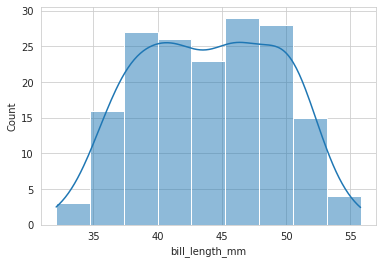

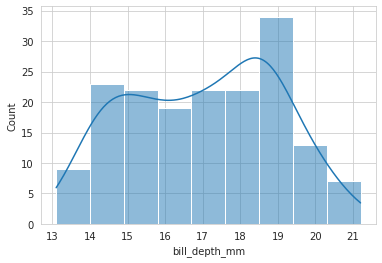

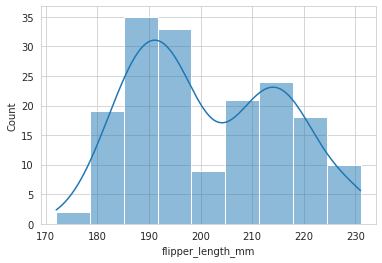

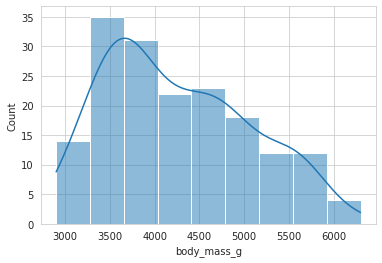

In [6]:
sns.set_style('whitegrid')
for col in ['bill_length_mm' , 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
  sns.histplot(data=df, x=col, kde=True)
  plt.show()
  print('\n')

In [7]:
from feature_engine.imputation import MeanMedianImputer
imputer = MeanMedianImputer(imputation_method='median',
                            variables=['bill_length_mm' , 'bill_depth_mm',
                                       'flipper_length_mm', 'body_mass_g'])

In [8]:
imputer.fit(df)

MeanMedianImputer(variables=['bill_length_mm', 'bill_depth_mm',
                             'flipper_length_mm', 'body_mass_g'])

In [9]:
imputer.imputer_dict_

{'bill_length_mm': 44.5,
 'bill_depth_mm': 17.1,
 'flipper_length_mm': 198.0,
 'body_mass_g': 4100.0}

In [10]:
df = imputer.transform(df)

In [11]:
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
320,Gentoo,Biscoe,48.5,15.0,219.0,4850.0,Female
76,Adelie,Torgersen,40.9,16.8,191.0,3700.0,Female
325,Gentoo,Biscoe,46.8,16.1,215.0,5500.0,Male
42,Adelie,Dream,36.0,18.5,186.0,3100.0,Female


In [12]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

In [18]:
# 1 loading data with missing data
df = sns.load_dataset('penguins')
df = df.sample(frac=0.5, random_state=5)
df.isnull().sum()

species              0
island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  7
dtype: int64

In [19]:
# 2 set pipeline as median
pipeline = Pipeline([
      ( 'median',  MeanMedianImputer(imputation_method='median',
                                     variables=['bill_length_mm' , 'bill_depth_mm',
                                                'flipper_length_mm', 'body_mass_g']) )
])
pipeline

Pipeline(steps=[('median',
                 MeanMedianImputer(variables=['bill_length_mm', 'bill_depth_mm',
                                              'flipper_length_mm',
                                              'body_mass_g']))])

In [20]:
# 3 fit the pipeline
pipeline.fit(df)

Pipeline(steps=[('median',
                 MeanMedianImputer(variables=['bill_length_mm', 'bill_depth_mm',
                                              'flipper_length_mm',
                                              'body_mass_g']))])

In [21]:
# transform the dataset
df = pipeline.transform(df)

In [22]:
df.isnull().sum() # check missing data again

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

In [23]:
# replacing with arbituary number

from feature_engine.imputation import ArbitraryNumberImputer

In [24]:
df = sns.load_dataset('penguins')
df = df.sample(frac=0.5, random_state=5)
df.isnull().sum()

species              0
island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  7
dtype: int64

In [25]:
pipeline = Pipeline([
      ( 'bill_length_mm',  ArbitraryNumberImputer(arbitrary_number=-100,
                                                  variables=['bill_length_mm']) ),

      ( 'other_variables',  ArbitraryNumberImputer(arbitrary_number=-500,
                                                   variables=['bill_depth_mm',
                                                              'flipper_length_mm',
                                                              'body_mass_g']) )

])
pipeline

Pipeline(steps=[('bill_length_mm',
                 ArbitraryNumberImputer(arbitrary_number=-100,
                                        variables=['bill_length_mm'])),
                ('other_variables',
                 ArbitraryNumberImputer(arbitrary_number=-500,
                                        variables=['bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']))])

In [26]:
pipeline.fit(df)

Pipeline(steps=[('bill_length_mm',
                 ArbitraryNumberImputer(arbitrary_number=-100,
                                        variables=['bill_length_mm'])),
                ('other_variables',
                 ArbitraryNumberImputer(arbitrary_number=-500,
                                        variables=['bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']))])

In [27]:
df = pipeline.transform(df)

In [28]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

In [29]:
pipeline['bill_length_mm'].imputer_dict_

{'bill_length_mm': -100}

In [30]:
pipeline['other_variables'].imputer_dict_

{'bill_depth_mm': -500, 'flipper_length_mm': -500, 'body_mass_g': -500}

In [31]:
# replace with categorical values

from feature_engine.imputation import CategoricalImputer

In [32]:
df = sns.load_dataset('penguins')
df = df.sample(n=50, random_state=1)
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  1
dtype: int64

In [33]:
df['sex'].value_counts()

Male      29
Female    20
Name: sex, dtype: int64

In [34]:
pipeline = Pipeline([
      ( 'categorical_imputer', CategoricalImputer(imputation_method='missing',
                                                  fill_value='Missing',
                                                  variables=['sex']) )
])
pipeline

Pipeline(steps=[('categorical_imputer', CategoricalImputer(variables=['sex']))])

In [35]:
df = pipeline.fit_transform(df)

In [36]:
df['sex'].value_counts()

Male       29
Female     20
Missing     1
Name: sex, dtype: int64

In [37]:
# replace with most frequent

df = sns.load_dataset('penguins')

In [38]:
pipeline = Pipeline([
      ( 'categorical_imputer', CategoricalImputer(imputation_method='frequent',
                                                  variables=['sex']) )
])


df = pipeline.fit_transform(df)

In [39]:
df['sex'].value_counts()

Male      179
Female    165
Name: sex, dtype: int64

In [40]:
# Drop missing data

from feature_engine.imputation import DropMissingData

In [41]:
df = sns.load_dataset('penguins')
print(f"{df.shape} \n")
df.isnull().sum()

(344, 7) 



species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [42]:
pipeline = Pipeline([
      ( 'drop_na', DropMissingData() )
])


df = pipeline.fit_transform(df)

In [43]:
print(f"{df.shape} \n")
df.isnull().sum()

(333, 7) 



species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64